In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrow, Arc

def draw_rolling_diagram(R=3, r=1, theta_deg=30, save_path=None):
    """
    Rolling-circle diagram with:
      - v drawn from the small-circle center (longer, tangent to center path),
      - ω curved arrow placed on TOP of the small circle (outside) to avoid crossings,
      - R and r shown as teal radius segments with midpoint labels.
    """
    theta = np.deg2rad(theta_deg)
    RR = R + r
    O = (0.0, 0.0)
    C = (RR*np.cos(theta), RR*np.sin(theta))

    fig, ax = plt.subplots(figsize=(6, 6))
    col, teal = '#1f2d3a', '#1f6f7a'

    # Dashed path of the rolling center
    ax.add_patch(Circle(O, RR, fill=False, ls='--', lw=1.5, color=col))

    # Circles
    ax.add_patch(Circle(O, R, fill=False, lw=2, color=col))
    ax.add_patch(Circle(C, r, fill=False, lw=2, color=col))

    # Direction from O to C
    ang = np.arctan2(C[1]-O[1], C[0]-O[0])

    # Radius R with midpoint label
    R_end = (O[0] + R*np.cos(ang), O[1] + R*np.sin(ang))
    ax.plot([O[0], R_end[0]], [O[1], R_end[1]], color='#1f6f7a', lw=2)
    R_mid = (O[0] + 0.5*R*np.cos(ang), O[1] + 0.5*R*np.sin(ang))
    ax.text(R_mid[0], R_mid[1], r"$R$", color='#1f6f7a', fontsize=12, ha='center', va='bottom')

    # Radius r with midpoint label
    r_end = (C[0] - r*np.cos(ang), C[1] - r*np.sin(ang))
    ax.plot([C[0], r_end[0]], [C[1], r_end[1]], color='#1f6f7a', lw=2)
    r_mid = (C[0] - 0.5*r*np.cos(ang), C[1] - 0.5*r*np.sin(ang))
    ax.text(r_mid[0], r_mid[1], r"$r$", color='#1f6f7a', fontsize=12, ha='center', va='bottom')

    # Velocity vector from small-circle center (tangent)
    vx, vy = np.cos(ang + np.pi/2), np.sin(ang + np.pi/2)
    v_len = 1.8
    ax.add_patch(FancyArrow(C[0], C[1], v_len*vx, v_len*vy,
                            width=0.025, head_width=0.22, head_length=0.22,
                            color='#1f6f7a'))
    ax.text(C[0] + v_len*vx + 0.12, C[1] + v_len*vy, r"$\vec{v}$", color='#1f6f7a', fontsize=12)

    # ω curved arrow OUTSIDE small circle, on top (absolute angles 70°→110°)
    arc_rad = 1.20 * r
    start_deg_abs, end_deg_abs = 70, 110
    arc = Arc(C, 2*arc_rad, 2*arc_rad, theta1=start_deg_abs, theta2=end_deg_abs, color='#1f6f7a', lw=2)
    ax.add_patch(arc)
    end_rad = np.deg2rad(end_deg_abs)
    hx = C[0] + arc_rad*np.cos(end_rad)
    hy = C[1] + arc_rad*np.sin(end_rad)
    tdx, tdy = -np.sin(end_rad), np.cos(end_rad)  # CCW tangent
    ax.add_patch(FancyArrow(hx - 0.12*tdx, hy - 0.12*tdy, 0.12*tdx, 0.12*tdy,
                            width=0.0, head_width=0.18, head_length=0.18,
                            color='#1f6f7a', length_includes_head=True))
    ax.text(hx + 0.22, hy + 0.18, r"$\omega$", color='#1f6f7a', fontsize=12)

    # Layout
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-RR-1.4, RR+1.8)
    ax.set_ylim(-RR-1.4, RR+1.8)
    ax.axis('off')

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    return fig, ax


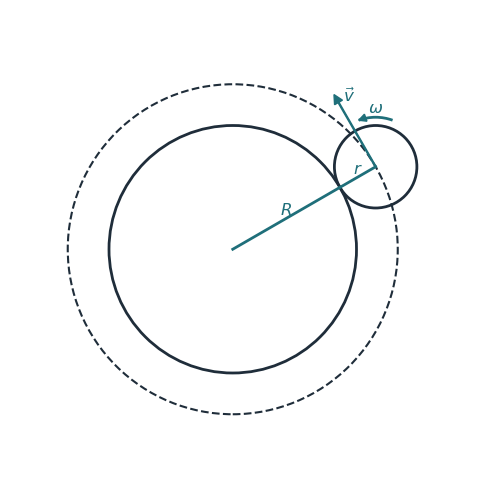

In [17]:

# Example usage:
fig, ax = draw_rolling_diagram(R=3, r=1, theta_deg=30, save_path="fig2.png")
